In [2]:
%reload_ext autoreload
%autoreload 2
from projet_madi import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pydotplus as dot
from IPython.display import SVG
from projet_madi import *

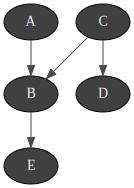

In [5]:
%reload_ext autoreload
%autoreload 2
bn=gum.fastBN("A->B<-C->D->E<-B")
bn.eraseArc("D","E")
gnb.showBN(bn)

In [6]:
%reload_ext autoreload
%autoreload 2
for i in bn.nodes():
    print("variable {} : {}".format(i,bn.variable(i)))
print()
for i in bn.nodes():
    print("cpt {} : {}".format(i,bn.cpt(i)))

variable 0 : A[0,1]
variable 1 : B[0,1]
variable 2 : C[0,1]
variable 3 : D[0,1]
variable 4 : E[0,1]

cpt 0 : <A:0> :: 0.496308 /<A:1> :: 0.503692
cpt 1 : <B:0|A:0|C:0> :: 0.570684 /<B:1|A:0|C:0> :: 0.429316 /<B:0|A:1|C:0> :: 0.684119 /<B:1|A:1|C:0> :: 0.315881 /<B:0|A:0|C:1> :: 0.299726 /<B:1|A:0|C:1> :: 0.700274 /<B:0|A:1|C:1> :: 0.543547 /<B:1|A:1|C:1> :: 0.456453
cpt 2 : <C:0> :: 0.591703 /<C:1> :: 0.408297
cpt 3 : <D:0|C:0> :: 0.57657 /<D:1|C:0> :: 0.42343 /<D:0|C:1> :: 0.353261 /<D:1|C:1> :: 0.646739
cpt 4 : <E:0|B:0> :: 0.920692 /<E:1|B:0> :: 0.0793081 /<E:0|B:1> :: 0.176182 /<E:1|B:1> :: 0.823818


In [7]:
bn.cpt(3)

(gum::Potential<double>@0x7f98bb439b20) <D:0|C:0> :: 0.57657 /<D:1|C:0> :: 0.42343 /<D:0|C:1> :: 0.353261 /<D:1|C:1> :: 0.646739

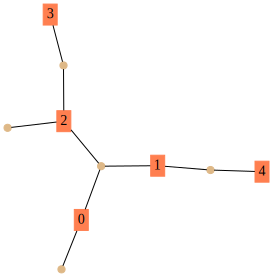

In [8]:
gf = FactorGraph();
gf.build(bn);
g=dot.graph_from_dot_data(gf.show())
SVG(g.create_svg())

In [9]:
#import pyAgrum as gum
#import pyAgrum.lib.notebook as gnb

#a,b,c=[gum.LabelizedVariable(s,s,2) for s in "abc"]
#p1=gum.Potential().add(a).add(b).fillWith([1,2,3,4]).normalize()
#p2=gum.Potential().add(b).add(c).fillWith([4,5,2,3]).normalize()

#gnb.sideBySide(p1,p2,p1+p2,
#              captions=['p1','p2','p1+p2'])

In [18]:
%reload_ext autoreload
%autoreload 2
print("Exo:")
spi=TreeSumProductInference(gf) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages
gnb.showPotential(spi.posterior(3))
#spi.posterior("A")          # retourne la distribution de 'A' sous la forme d'un `gum.Potential`

# pour comparer
print("Inference dans PyAgrum:")
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showPotential(ie.posterior(3))

Exo:


Inference dans PyAgrum:


In [19]:
%reload_ext autoreload
%autoreload 2

print("Exo LBPSumproductInference:")
spi=LBPSumProductInference(gf) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages
gnb.showPotential(spi.posterior(3))
spi.posterior(0)          # retourne la distribution de 'A' sous la forme d'un `gum.Potential`

# pour comparer
print("Inference LBP dans PyAgrum:")
ie=gum.LoopyBeliefPropagation(bn)
ie.makeInference()
gnb.showPotential(ie.posterior(3))

Exo LBPSumproductInference:


Inference LBP dans PyAgrum:
